Data Cleaning

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
#loading data
data = pd.read_csv('/content/drive/MyDrive/Spill_Incidents.csv')

In [4]:
# Clean up raw data - set date format, re-order into ascending date order, remove old codes
data['Spill Date'] = pd.to_datetime(data['Spill Date'])
data.index = pd.DatetimeIndex(data['Spill Date'])
data = data.sort_index().copy()
data = data[data['Source']!='Missing Code in Old Data - Must be fixed']
data = data[['Street 1', 'Locality', 'County', 'Spill Date', 'Contributing Factor',
                                'Source', 'Material Name', 'Material Family', 'Quantity', 'Units']].dropna()
data = data[data['Spill Date'] >= '1990-01-01' ]


Plotting frequency of spill events

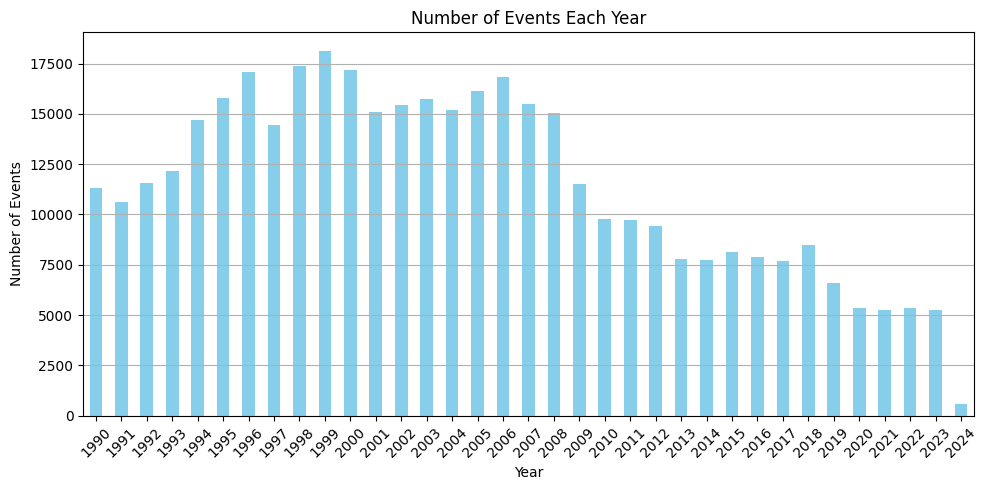

In [8]:
data['year'] = data['Spill Date'].dt.year

# Count number of events each year
events_per_year = data.groupby('year').size()

# Plotting the number of events each year
plt.figure(figsize=(10, 5))
events_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Number of Events Each Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Plotting the amount of oil spilt each year

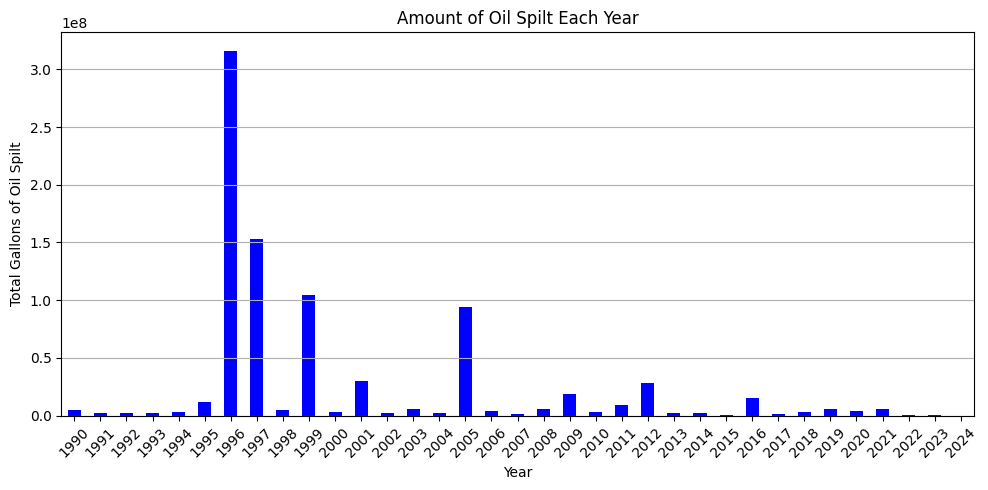

In [9]:
data_filt=data[data['Units'] == 'Gallons']
oil_spilt_per_year = data_filt.groupby('year')['Quantity'].sum()
plt.figure(figsize=(10, 5))
oil_spilt_per_year.plot(kind='bar', color='blue')
plt.xlabel('Year')
plt.style.use('seaborn-v0_8-muted')
plt.ylabel('Total Gallons of Oil Spilt')
plt.title('Amount of Oil Spilt Each Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Breaking down the top three causes of spills each year

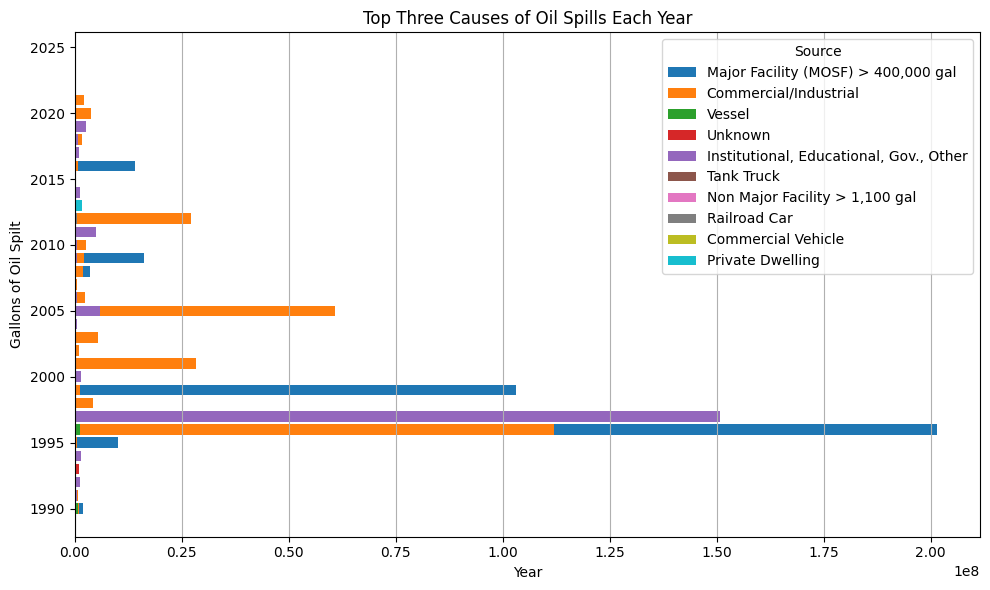

In [10]:
data_grouped = data_filt.groupby(['year', 'Source'])['Quantity'].sum().reset_index()

# Get the top three causes of oil spills for each year
top_causes_per_year = data_grouped.groupby('year').apply(lambda x: x.nlargest(3, 'Quantity')).reset_index(drop=True)

# Plotting the segmented bar plot for top causes of oil spills each year
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors  # color palette
for i, cause in enumerate(top_causes_per_year['Source'].unique()):
    df_cause = top_causes_per_year[top_causes_per_year['Source'] == cause]
    try:
      plt.barh(df_cause['year'], df_cause['Quantity'], color=colors[i], label=cause)
    except:
      break

plt.xlabel('Year')
plt.ylabel('Gallons of Oil Spilt')
plt.title('Top Three Causes of Oil Spills Each Year')
plt.legend(title='Source')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Pie chart for the top 5 causes of spill incidents

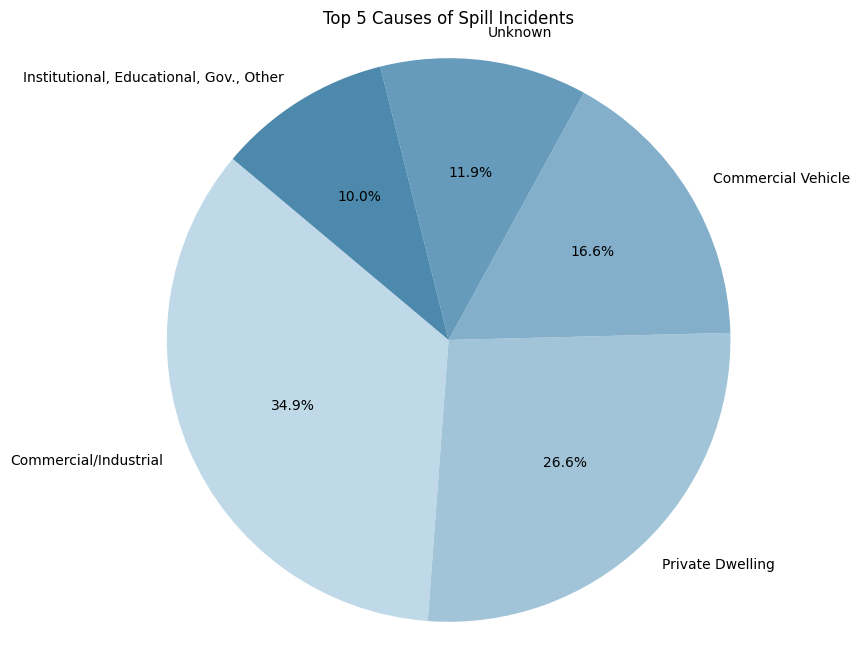

In [16]:
# Count occurrences of each cause
cause_counts = data_filt['Source'].value_counts()

top_5_causes = cause_counts.head(5)

# Plotting the pie chart for the top 5 causes
plt.figure(figsize=(8, 8))
colors = ['#C0D9E8', '#A2C4D9', '#84AFCB', '#669BBB', '#4D89AC']
plt.pie(top_5_causes, labels=top_5_causes.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Top 5 Causes of Spill Incidents')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

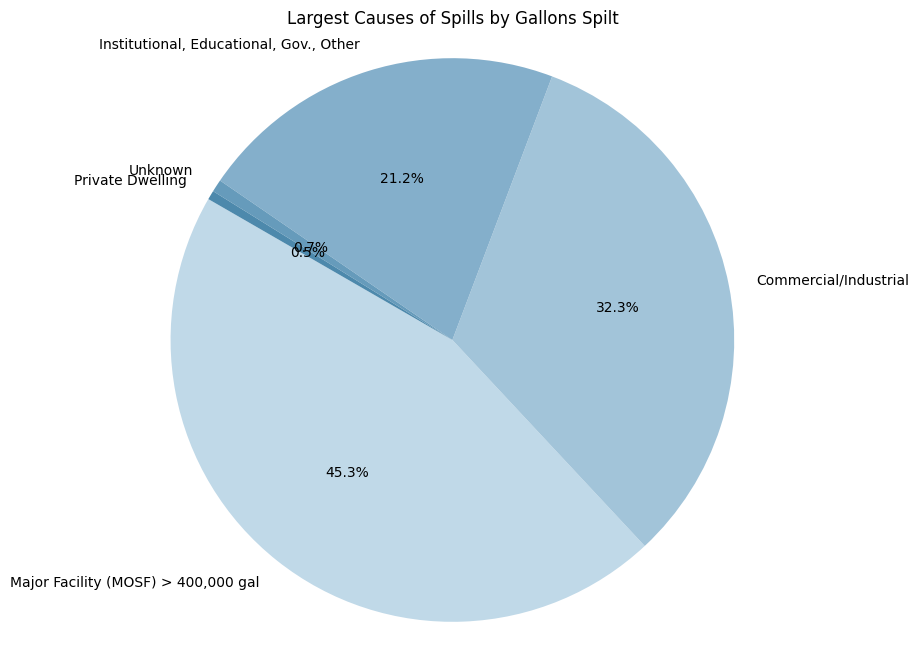

In [17]:
cause_gallons = data_filt.groupby('Source')['Quantity'].sum()

# Select top causes based on sum of gallons spilled
top_causes = cause_gallons.nlargest(5)
colors =['#C0D9E8', '#A2C4D9', '#84AFCB', '#669BBB', '#4D89AC']
# Plotting the pie chart for largest causes of spills by gallons spilt
plt.figure(figsize=(8, 8))
plt.pie(top_causes, labels=top_causes.index, autopct='%1.1f%%', startangle=150,colors=colors)
plt.title('Largest Causes of Spills by Gallons Spilt')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Counting number of times a county was the worst offending one

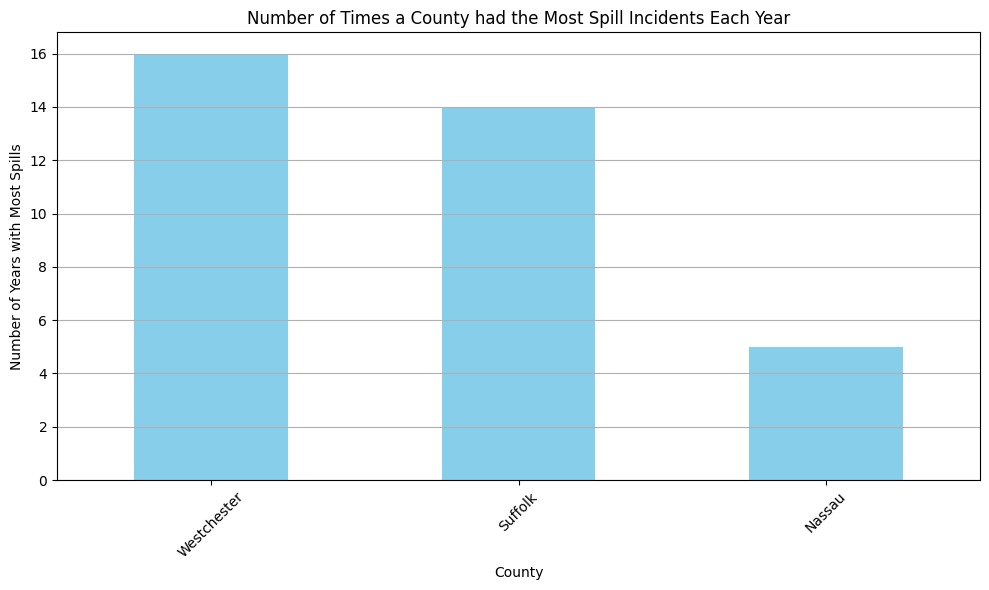

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by year and county, then count the number of spill incidents
county_counts = data_filt.groupby(['year', 'County']).size().reset_index(name='incident_count')

# Find the county with the most incidents for each year
most_incidents_per_year = county_counts.loc[county_counts.groupby('year')['incident_count'].idxmax()]
# Count the occurrences of each county being the most frequent for each year
county_most_frequent_counts = most_incidents_per_year['County'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
county_most_frequent_counts.plot(kind='bar', color='skyblue')
plt.xlabel('County')
plt.ylabel('Number of Years with Most Spills')
plt.title('Number of Times a County had the Most Spill Incidents Each Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
